Data collected for 1020 split maps.


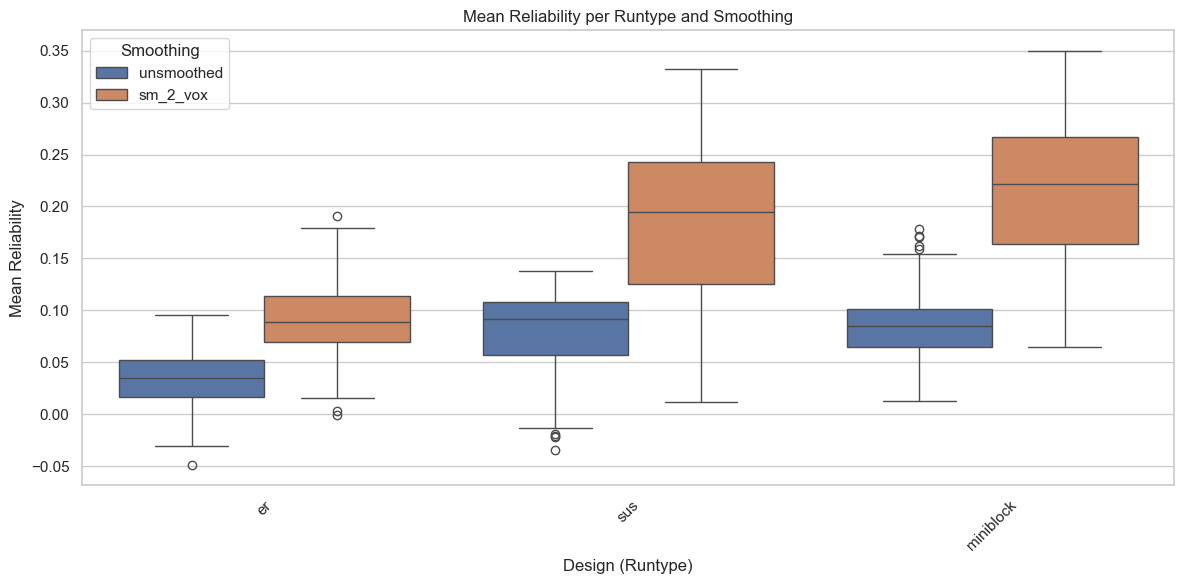

In [31]:
import numpy as np
import nibabel as nib
from nilearn import image
import pandas as pd
import os
from os.path import join, split
import matplotlib.pyplot as plt
import seaborn as sns

outdir = '/Users/danieljanini/Documents/Thesis/miniblock/Outputs/reliability/'
homedir = split(os.getcwd())[0]
datadir = '/Users/danieljanini/Documents/Thesis/miniblock/'
presdir = join(homedir, 'Behavior', 'designmats')

subs = subs = [f"{i:02d}" for i in range(1, 20) if i not in [9, 16]]
smooths = ["unsmoothed", "sm_2_vox"]
runtypes = ["er", "sus", "miniblock"]

splits = range(1,11)

results = []

for sub in subs:
    for runtype in runtypes:
        for smoothing in smooths:
            for split_num in splits:
                # Load brain mask
                #brain_mask_path = join(datadir, 'derivatives', f'sub-{sub}', 'anat', f'visual_voxels_mask_{smoothing}.nii.gz')
                brain_mask_path = "/Users/danieljanini/Documents/Thesis/Code/masking/occipital_mask.nii"
                brain_mask = image.load_img(brain_mask_path)
                mask = brain_mask.get_fdata()

                # Construct filename
                reliability_filename = join(
                    outdir, f'sub-{sub}', f'{smoothing}_sub-{sub}_{runtype}_reliability_map_split_{split_num}.nii.gz'
                )

                if os.path.exists(reliability_filename):
                    reliability_img = nib.load(reliability_filename)
                    reliability_data = reliability_img.get_fdata()

                    masked_values = reliability_data[mask.astype(bool)]
                    median_reliability = np.nanmedian(masked_values)
                    mean_reliability = np.nanmean(masked_values)
                    max_reliability = masked_values[np.nanargmax(masked_values)]

                    results.append({
                        "subject": sub,
                        "runtype": runtype,
                        "smoothing": smoothing,
                        "split": split_num,
                        "median_reliability": median_reliability,
                        "mean_reliability": mean_reliability,
                        "maximum_reliability": max_reliability
                    })
                else:
                    print(f"Missing file: {reliability_filename}")

# Build DataFrame
df = pd.DataFrame(results)

# Save as CSV
# df.to_csv('reliability_results_all.csv', index=False)

print("Data collected for", len(df), "split maps.")

# Quick Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="runtype", y="median_reliability", hue="smoothing")
plt.title("Mean Reliability per Runtype and Smoothing")
plt.ylabel("Mean Reliability")
plt.xlabel("Design (Runtype)")
plt.legend(title="Smoothing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

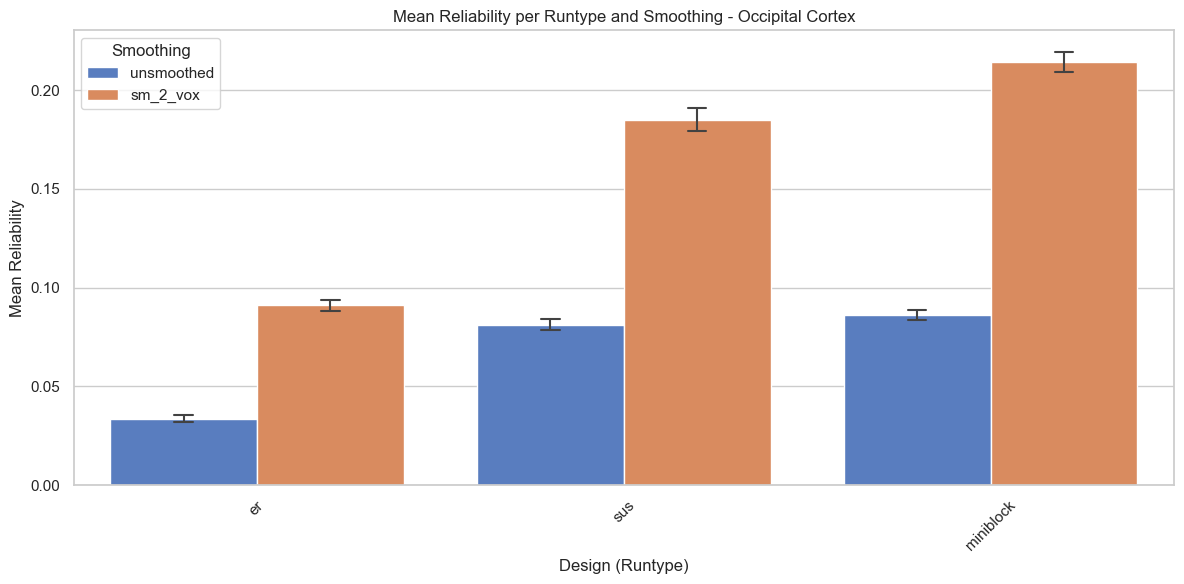

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot directly from the raw data
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x="runtype",
    y="median_reliability",
    hue="smoothing",
    palette="muted",
    errorbar="se",         # Use standard error for error bars
    capsize=0.1,     # Adds little caps on error bars
    err_kws={'linewidth': 1.5}     # Thickness of error bars
)

plt.title("Mean Reliability per Runtype and Smoothing - Occipital Cortex")
plt.ylabel("Mean Reliability")
plt.xlabel("Design (Runtype)")
plt.legend(title="Smoothing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


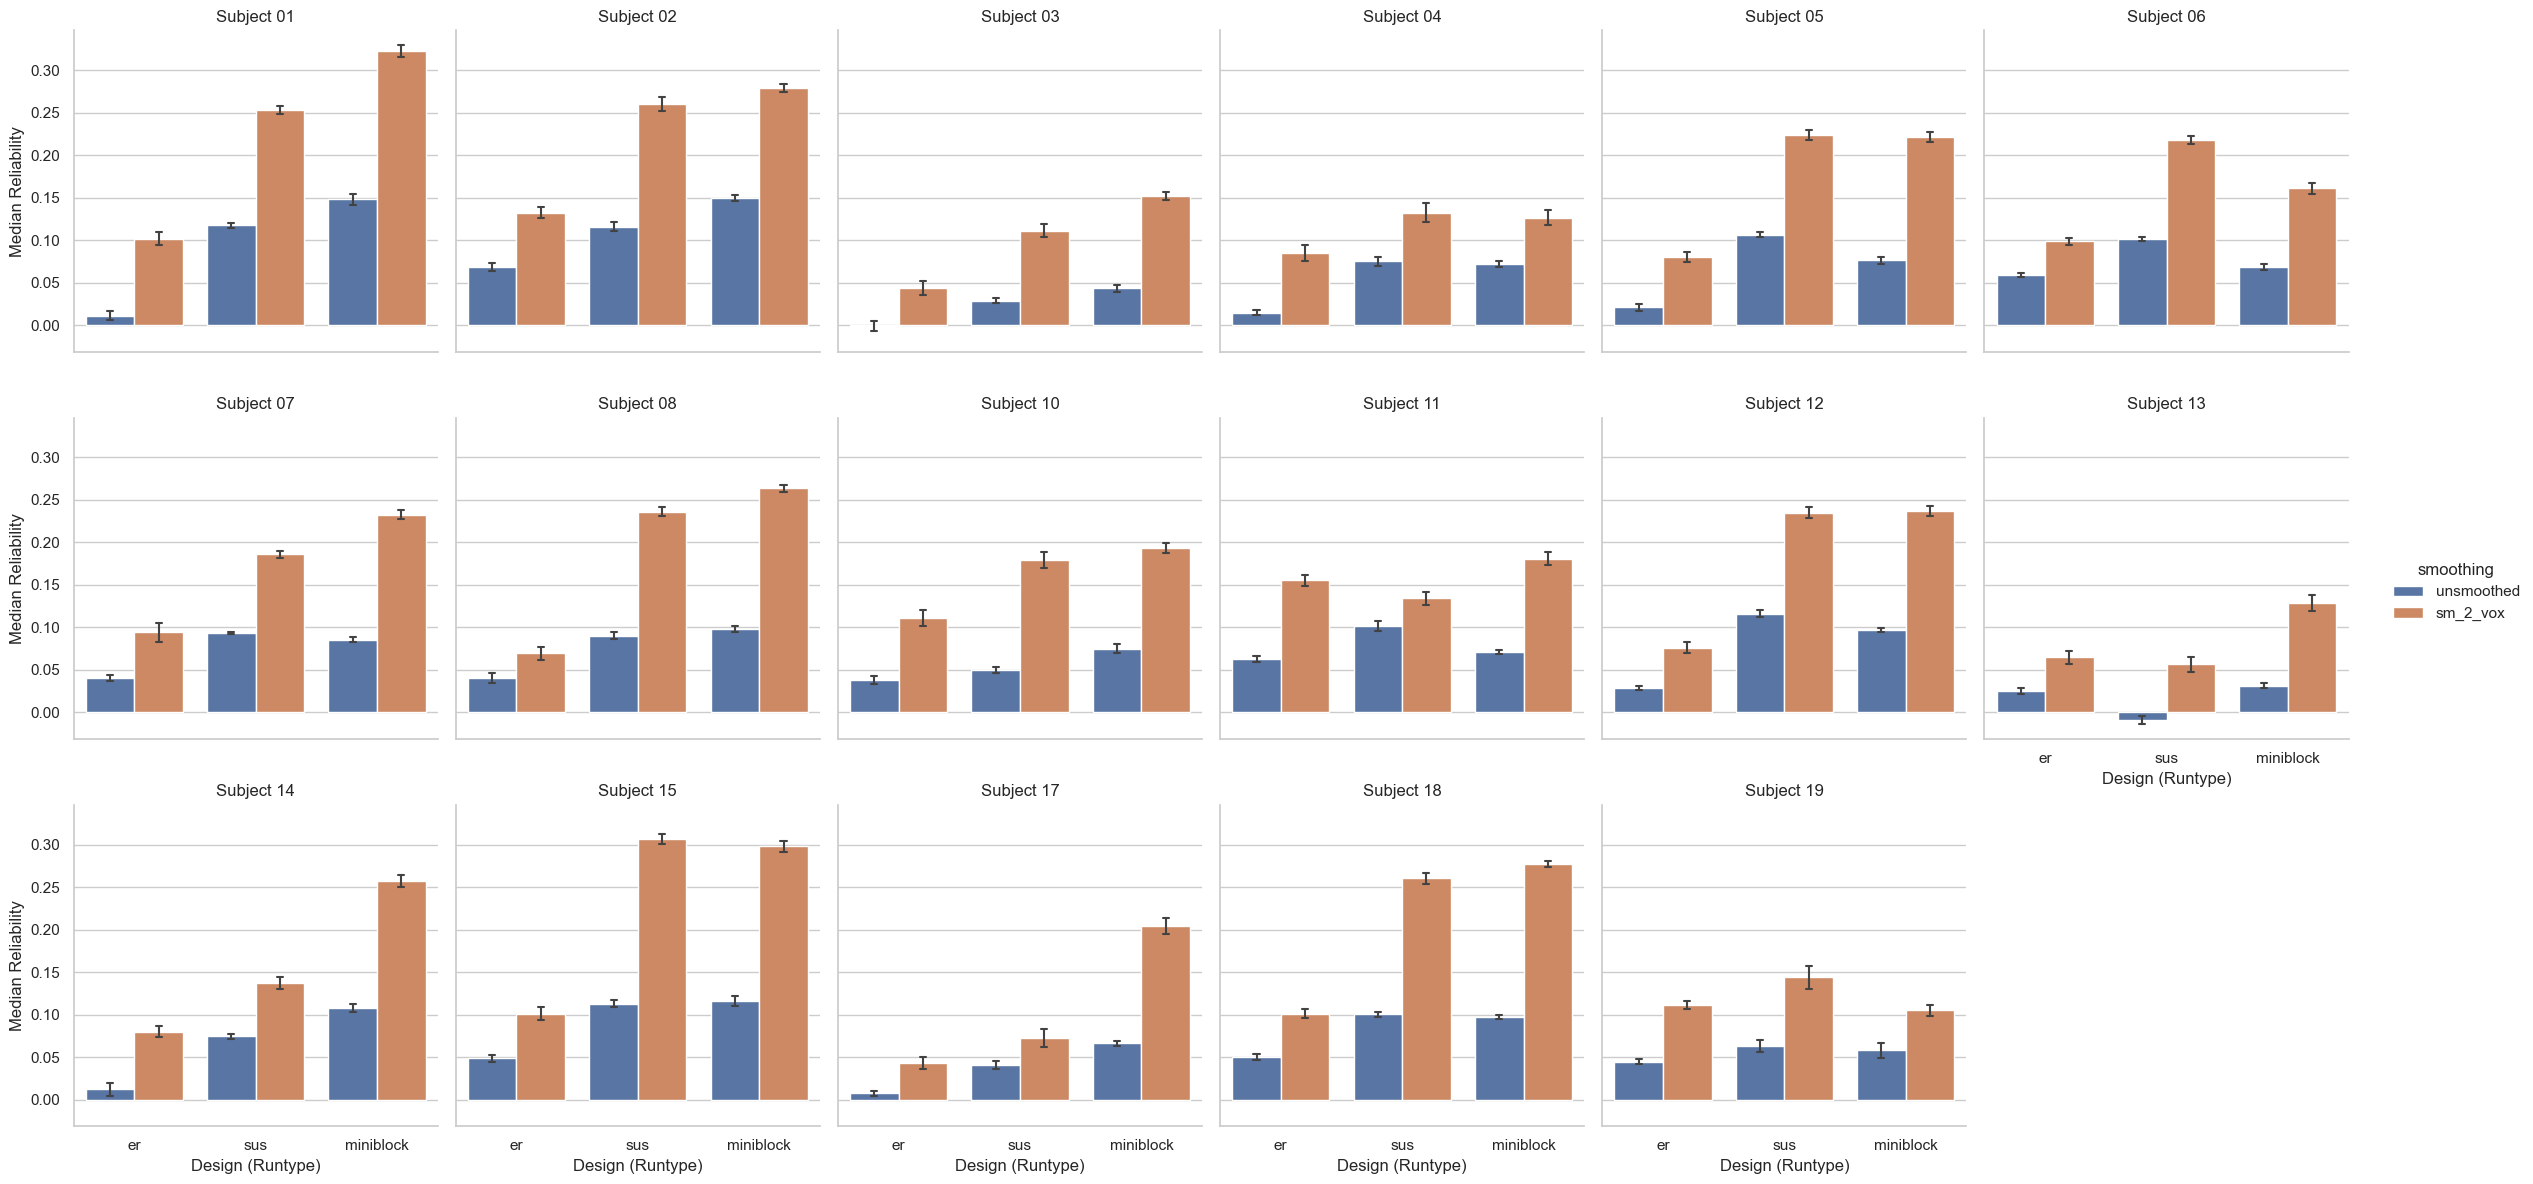

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the general style
sns.set(style="whitegrid")

# Create a FacetGrid of barplots, one for each subject
g = sns.catplot(
    data=df,
    kind="bar",
    x="runtype",
    y="median_reliability",
    hue="smoothing",
    col="subject",           # 👈 make one plot per subject
    col_wrap=6,              # 4 plots per row
    errorbar="se",                 # standard error as error bars
    capsize=0.1,             # small caps on error bars
    err_kws={'linewidth': 1.5},           # thickness of error bars
    height=4,                # size of each subplot
    aspect=1                 # width/height ratio
)

# Improve the overall figure
plt.title("Median Reliability per Runtype, Smoothing, and Participant - Occipital Cortex")
g.set_titles("Subject {col_name}")
g.set_axis_labels("Design (Runtype)", "Median Reliability")
g.tight_layout()
plt.show()
